In [72]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import os

In [73]:

folder_path = "1_005_ep2d_pace_aff_n_back_20130605"
file_to_view = "CT_2_NEURALMETH_20130605_001_005_ep2d_pace_aff_n_back_0001.hdr"
file_path = os.path.join(folder_path, file_to_view)

In [74]:
img = nib.load(file_path)
data = img.get_fdata()

In [75]:
print(f"file size =", data.shape)

file size = (64, 64, 36)


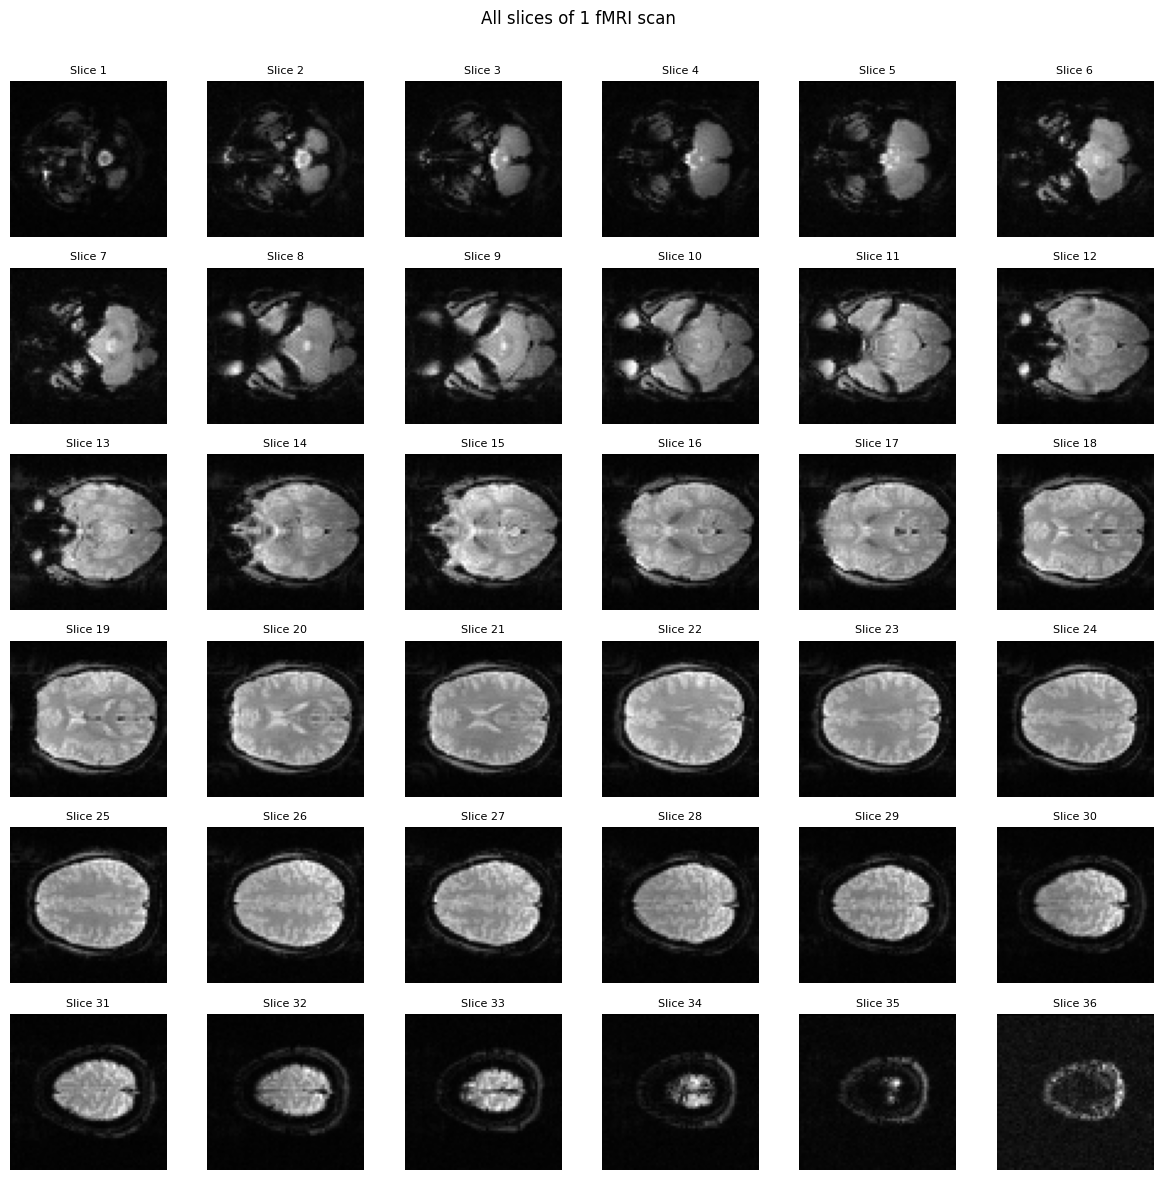

In [76]:
fig , axs = plt.subplots(6,6, figsize = (12,12))
fig.suptitle("All slices of 1 fMRI scan ")


for i in range(36):
    ax = axs[i // 6, i % 6]  
    ax.imshow(data[:, :, i], cmap='gray')
    ax.axis('off')
    ax.set_title(f"Slice {i+1}", fontsize=8)

plt.tight_layout()
plt.subplots_adjust(top=0.92)

plt.show()

In [77]:
pfc_data = data[:20,:,:]
print("New PFC Shape: ", pfc_data.shape)

New PFC Shape:  (20, 64, 36)


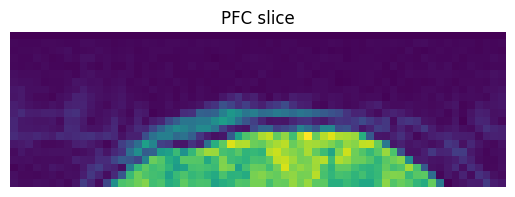

In [78]:
plt.imshow(pfc_data[:,:,pfc_data.shape[2] //2])
plt.title("PFC slice")
plt.axis('off')
plt.show()

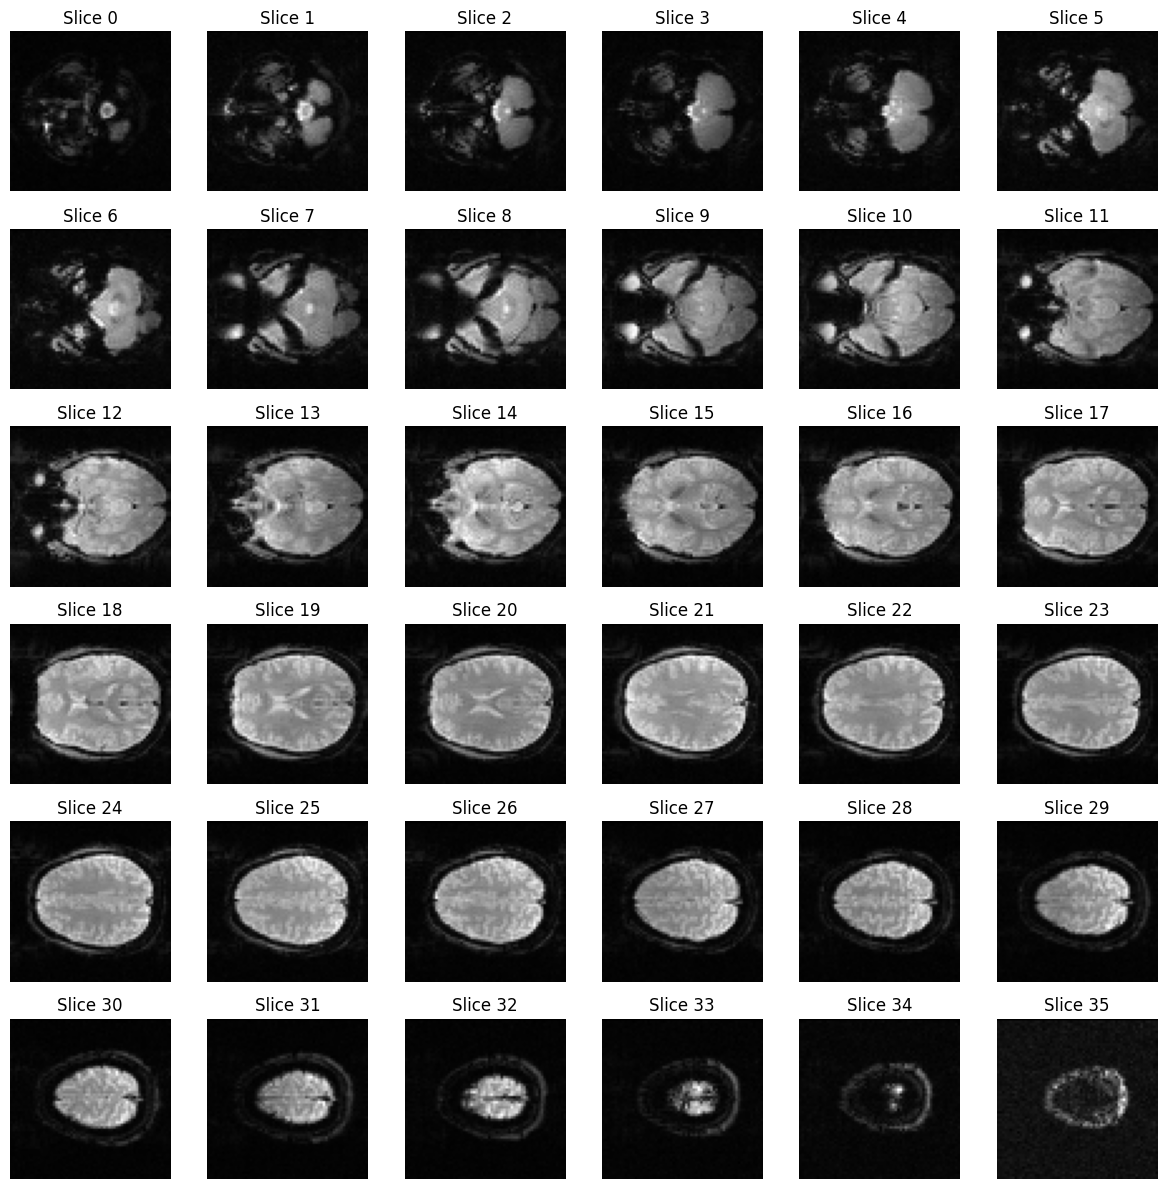

In [79]:
fig, axes = plt.subplots(6, 6, figsize=(12, 12))
axes = axes.ravel()

for i in range(data.shape[2]):  
    
    axes[i].imshow(data[:, :, i], cmap='gray')
    axes[i].set_title(f"Slice {i}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()


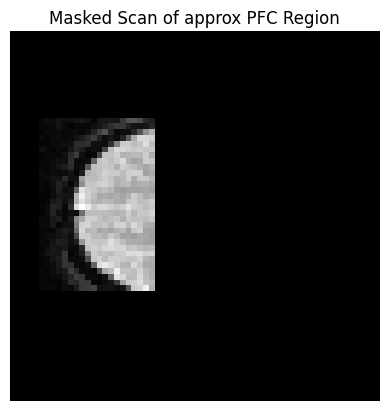

In [80]:
#This is an empty mask
mask = np.zeros_like(data)

#Tring to approximarte approrpiate slcies for PFC
mask[15:45, 5:25, 18:30] = 1

masked_data = data * mask

#Visualise middle slice after masking
#middle_slice = masked_data[:,:, masked_data.shape[2] // 2]

plt.imshow(masked_data[:,:,25], cmap='gray')
plt.title("Masked Scan of approx PFC Region")
plt.axis('off')
plt.show()

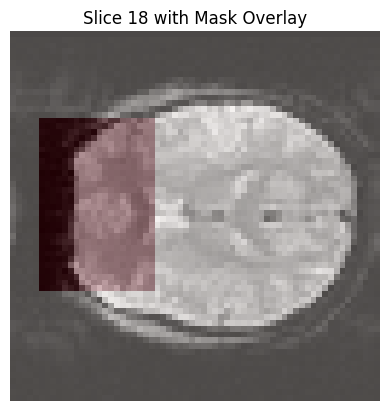

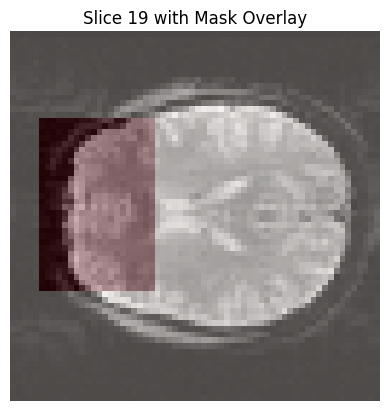

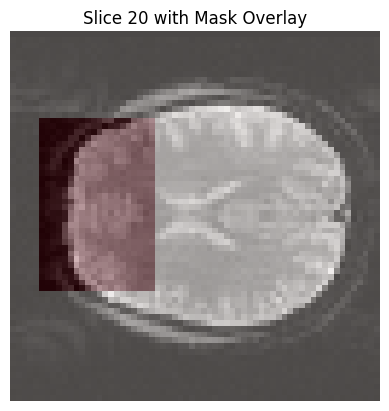

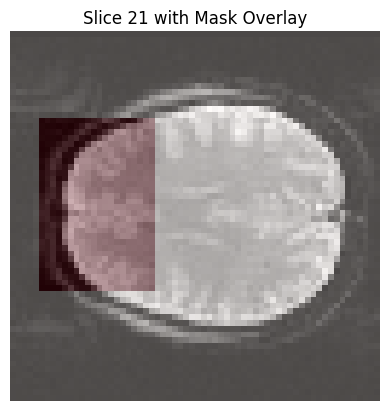

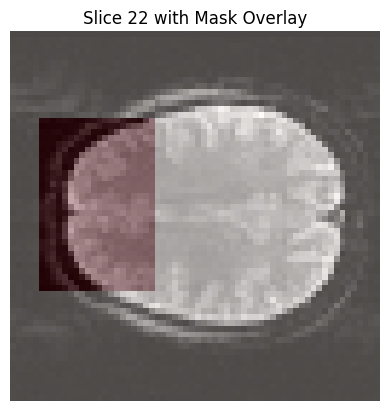

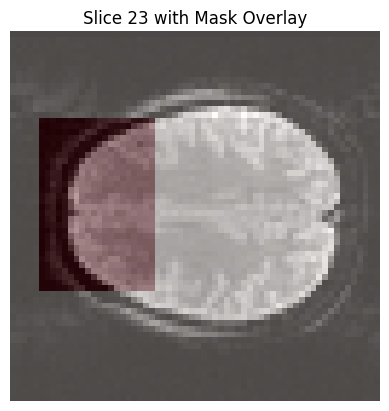

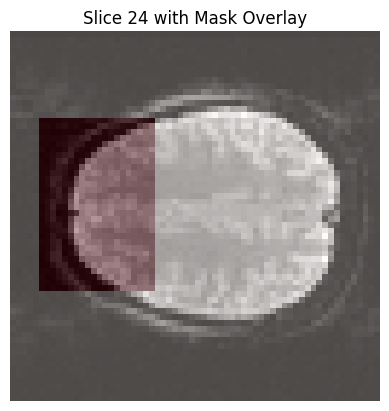

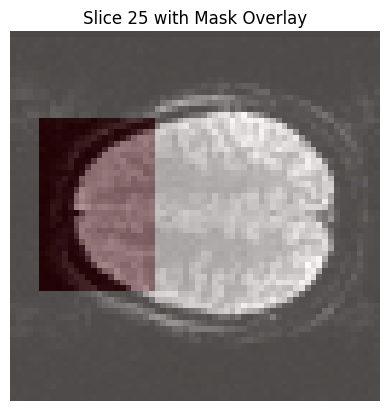

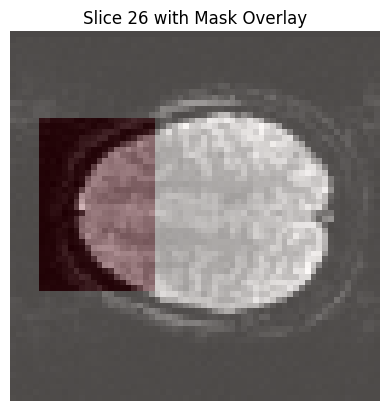

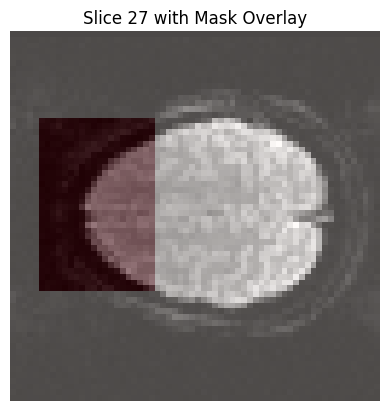

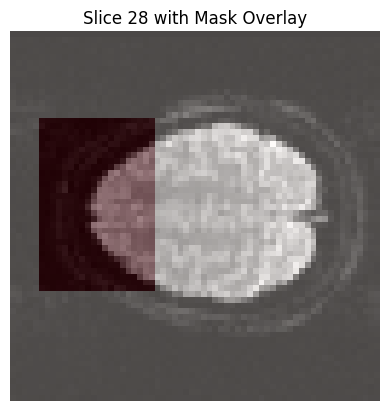

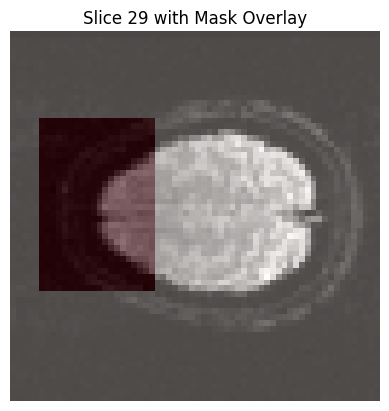

In [81]:
#The lsices i chose
middle_slices = range(18, 30)  

#Hilighting in red
for i in middle_slices:

    plt.imshow(data[:, :, i], cmap='gray')
    plt.imshow(mask[:, :, i], cmap='Reds', alpha=0.3)  
    plt.title(f"Slice {i} with Mask Overlay")
    plt.axis('off')
    plt.show()

In [82]:
#isolate the pfc voxels
pfc_data = data[mask == 1]
print(pfc_data)

[ 47.  46.  68. ... 362.  59.  34.]


In [83]:
pfc_mean = np.mean(pfc_data)
pfc_std = np.std(pfc_data)
pfc_min = np.min(pfc_data)
pfc_max = np.max(pfc_data)

print("PFC Mean Intensity:", pfc_mean)
print("PFC Std Deviation:", pfc_std)
print("PFC Min Intensity:", pfc_min)
print("PFC Max Intensity:", pfc_max)

PFC Mean Intensity: 442.4401388888889
PFC Std Deviation: 346.50904754098195
PFC Min Intensity: 4.0
PFC Max Intensity: 1282.0


Comparing PFC mean/variance between scans can help detect strucutral chanmges 

In [97]:
import nibabel as nib
import matplotlib.pyplot as plt

file_path_mask = r"C:\Users\adoni\Desktop\MSc Data Science 2025\Semester 1\Research Methods & Capstone Project\Data\CT\CT_MAY2016\FIRST SCAN\FIRST LEVEL ANALYSES_ANTONETTE_MAY2016\CT2\mask.img"


img_msk = nib.load(file_path_mask)
mask_data = img_msk.get_fdata()

print("Mask shape: ", mask_data.shape)



Mask shape:  (53, 63, 46)


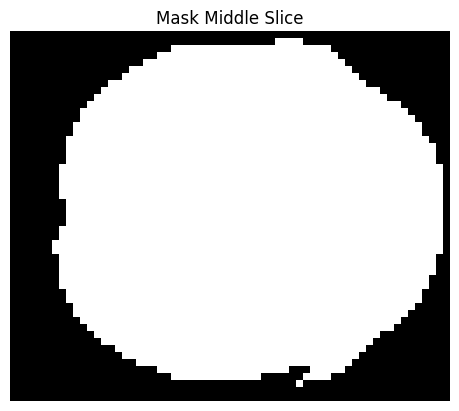

In [101]:

middle_slice_index = mask_data.shape[2] // 2
plt.imshow(mask_data[:, :, middle_slice_index], cmap='gray')
plt.title("Mask Middle Slice")
plt.axis('off')
plt.show()


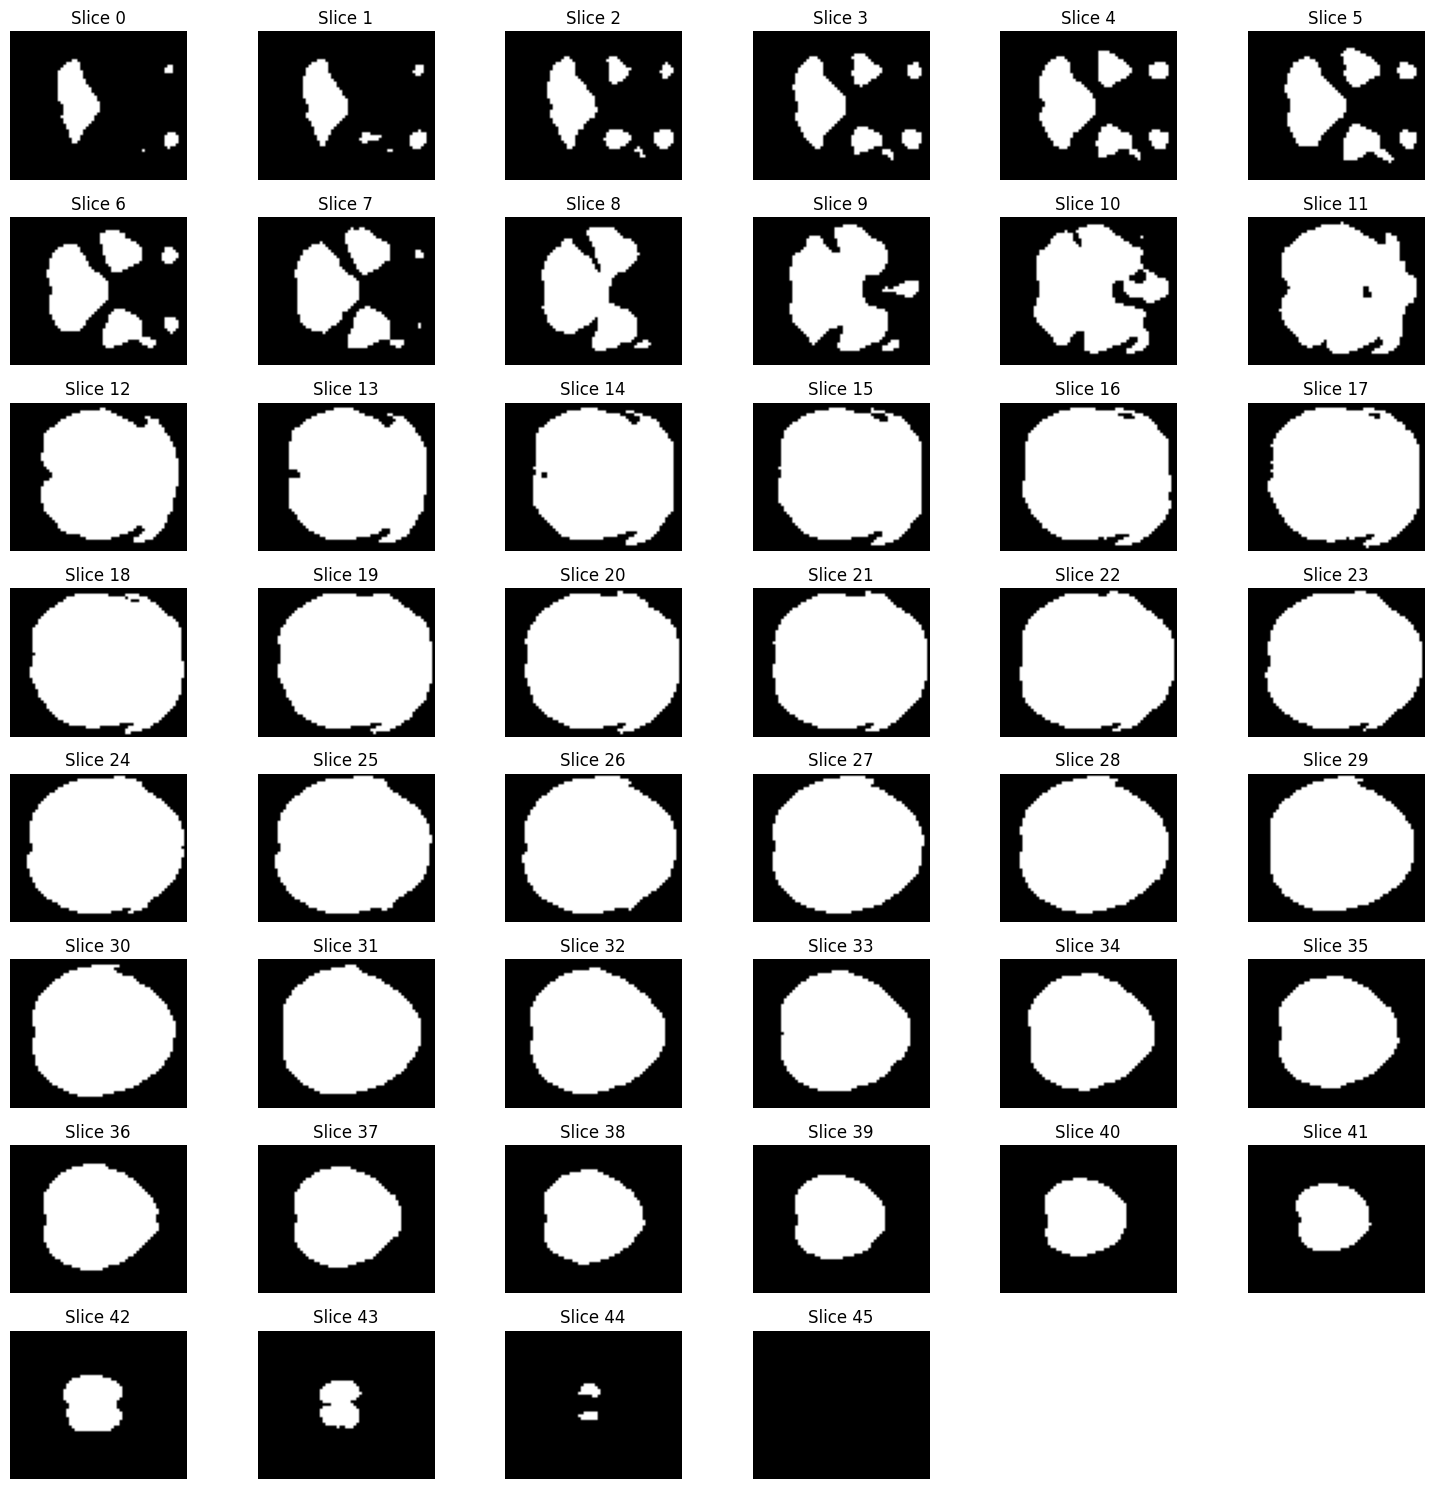

In [ ]:

import math

num_slices = mask_data.shape[2]


cols = 6
rows = math.ceil(num_slices / cols)

plt.figure(figsize=(15, 15) )

for i in range(num_slices):


    plt.subplot(rows, cols, i+1)
    plt.imshow(mask_data[:, :, i], cmap='gray')
    plt.axis('off')
    plt.title(f"Slice {i}")

plt.tight_layout()
plt.show()


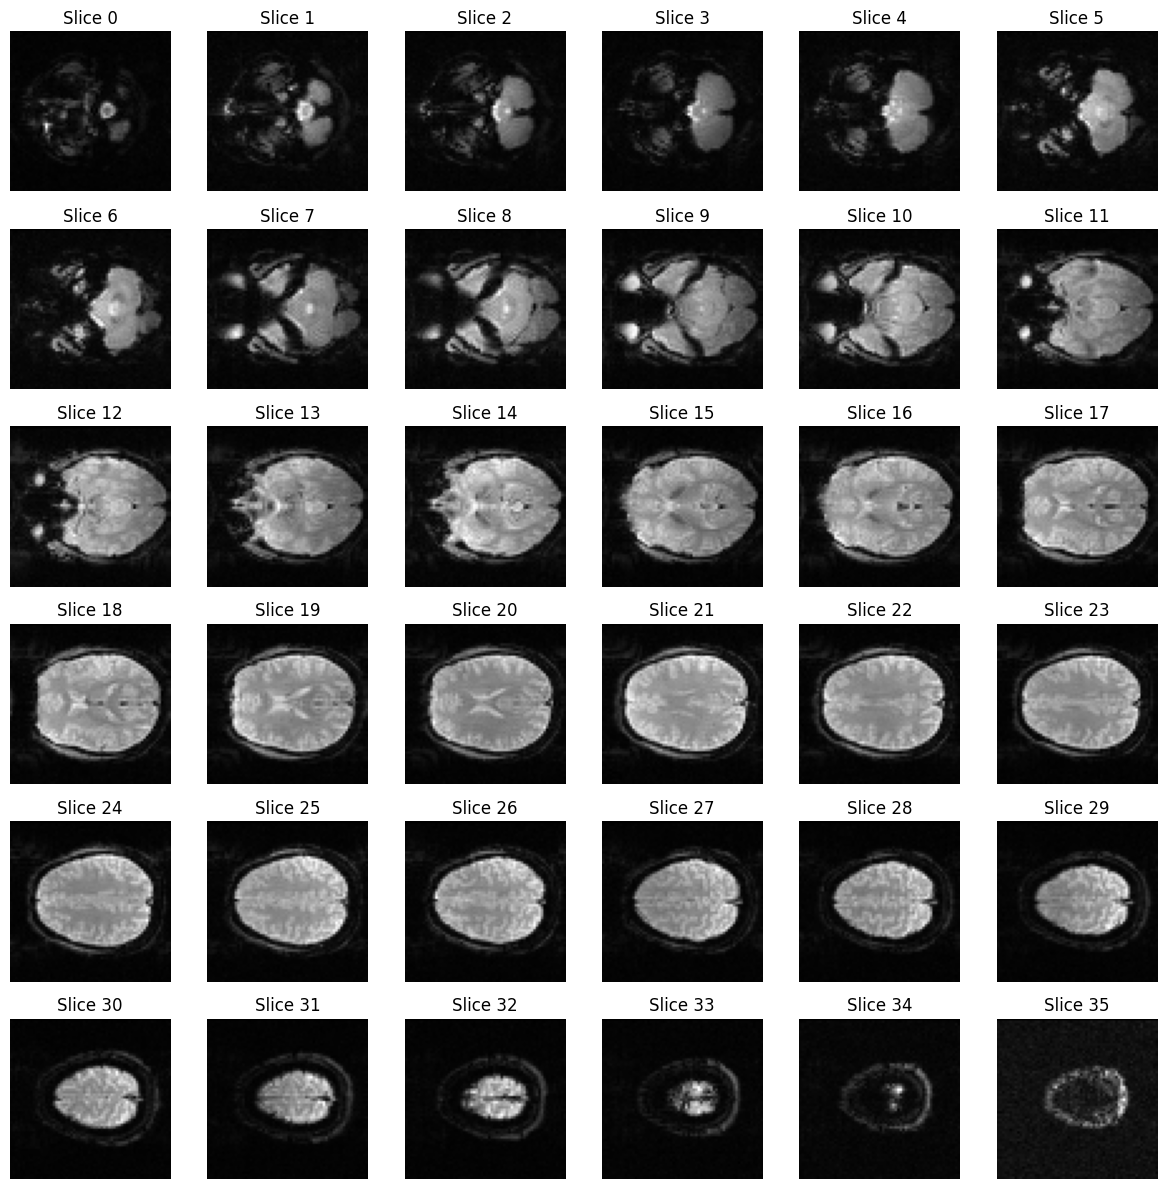

In [103]:
fig, axes = plt.subplots(6, 6, figsize=(12, 12))
axes = axes.ravel()

for i in range(data.shape[2]):  
    
    axes[i].imshow(data[:, :, i], cmap='gray')
    axes[i].set_title(f"Slice {i}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()
